In [ ]:
!pip list

In [ ]:
# %pip install lxml
# %pip install sqlite3
# %pip install fuzzywuzzy

# Method

## View Data

In [1]:
def view_data(df):
    display(df.head(5))
    display(df.tail(5))
    display(df.info())
    display(df.nunique())
    display(df.isna().sum())
    display(df.shape)

## Default Delete Data

In [2]:
def default_delete_data(df, columns_to_drop=None):
    # Drop duplicates
    df = df.drop_duplicates()

    # Drop unnecessary columns
    df = df.drop(columns=columns_to_drop)

    # Drop columns that have all null values
    df = df.dropna(axis=1, how='all')
    
    return df

## Delete Col with All Years Value NULL

In [3]:
def all_years_null_delete(df, years_col_index_start=2):
    
    years_subset = df.columns[years_col_index_start:]
    df = df.dropna(subset=years_subset, how='all')

    return df

## Imputate: Interpolation

In [4]:
def imp_interpolate(df, years_col_index_start=2, limit_direction='both'):
    columns_to_fill = df.columns[2:].tolist()

    if limit_direction == 'none':
        df[columns_to_fill] = df[columns_to_fill].interpolate(axis=1)
    else:
        df[columns_to_fill] = df[columns_to_fill].interpolate(axis=1, limit_direction=limit_direction)

## Melt Data

In [5]:
def melt_data(df, value_name):
    melted_df = pd.melt(df, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name=value_name)
    melted_df = melted_df.sort_values(by=['Country Code', 'Year'])
    melted_df = melted_df.reset_index(drop=True)
    return melted_df

# Data Ingestion

## Import Library

In [6]:
import pandas as pd
from IPython.display import display
import numpy as np

# XML
from bs4 import BeautifulSoup
# SQLite
import sqlite3
# API
import requests

## 1. Ingest (CSV)

### 1.1 Load Data

In [7]:
df_projects = pd.read_csv('data_source/projects_data.csv')
df_population_csv = pd.read_csv('data_source/population_data.csv', skiprows=4)
df_rural_population = pd.read_csv('data_source/rural_population_percent.csv', skiprows=4)
df_electricity_access = pd.read_csv('data_source/electricity_access_percent.csv', skiprows=4)
df_mystery = pd.read_csv('data_source/mystery.csv', encoding='utf-16')
df_gdp = pd.read_csv('data_source/gdp_data.csv', skiprows=4)

C:\Users\Adhira\AppData\Local\Temp\ipykernel_1348\1179581503.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_projects = pd.read_csv('data_source/projects_data.csv')


### 1.2 Display Data

In [8]:
df_list = [df_projects, df_population_csv, df_rural_population, df_electricity_access, df_mystery, df_gdp]

for df in df_list:
    view_data(df)

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18247,P037383,Europe and Central Asia,French Republic;French Republic,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18248 non-null  object 
 1   regionname                18248 non-null  object 
 2   countryname               18248 non-null  object 
 3   prodline                  18248 non-null  object 
 4   lendinginstr              18002 non-null  object 
 5   lendinginstrtype          18002 non-null  object 
 6   envassesmentcategorycode  12437 non-null  object 
 7   supplementprojectflg      18195 non-null  object 
 8   productlinetype           18248 non-null  object 
 9   projectstatusdisplay      18244 non-null  object 
 10  status                    18244 non-null  object 
 11  project_name              18248 non-null  object 
 12  boardapprovaldate         16744 non-null  object 
 13  board_approval_month      16744 non-null  object 
 14  closin

None

id                          18248
regionname                      7
countryname                   206
prodline                       10
lendinginstr                   18
lendinginstrtype                4
envassesmentcategorycode        6
supplementprojectflg            2
productlinetype                 1
projectstatusdisplay            4
status                          4
project_name                15554
boardapprovaldate            5311
board_approval_month           12
closingdate                  1605
lendprojectcost              4068
ibrdcommamt                  1211
idacommamt                   1121
totalamt                     1753
grantamt                      846
borrower                     1632
impagency                    3442
url                         18248
projectdoc                      0
majorsector_percent             0
sector1                      3060
sector2                      2314
sector3                      1596
sector4                      1162
sector5       

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

(18248, 57)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN
263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,4410212.0,...,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960              256
                 ... 
2014              260
2015              260
2016              260
2017              260
Unnamed: 62         0
Length: 63, dtype: int64

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

(264, 63)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231,NaN
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218,NaN
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160,NaN
263,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,87.392,87.179,86.918,86.422,85.908,85.380,...,66.622,66.804,66.985,67.166,67.346,67.499,67.624,67.723,67.793,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            259 non-null    float64
 5   1961            259 non-null    float64
 6   1962            259 non-null    float64
 7   1963            259 non-null    float64
 8   1964            259 non-null    float64
 9   1965            259 non-null    float64
 10  1966            259 non-null    float64
 11  1967            259 non-null    float64
 12  1968            259 non-null    float64
 13  1969            259 non-null    float64
 14  1970            259 non-null    float64
 15  1971            259 non-null    float64
 16  1972            259 non-null    float64
 17  1973            259 non-null    flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960              251
                 ... 
2014              251
2015              250
2016              250
2017              250
Unnamed: 62         0
Length: 63, dtype: int64

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64

(264, 63)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN,NaN
263,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,43.369082,36.063057,36.900000,36.728878,37.076813,32.300000,33.700000,38.145138,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960                0
                 ... 
2014              170
2015              162
2016              139
2017                0
Unnamed: 62         0
Length: 63, dtype: int64

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64

(264, 63)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      264 non-null    int64  
 1   Country Name    264 non-null    object 
 2   Country Code    264 non-null    object 
 3   Indicator Name  264 non-null    object 
 4   Indicator Code  264 non-null    object 
 5   1960            260 non-null    float64
 6   1961            260 non-null    float64
 7   1962            260 non-null    float64
 8   1963            260 non-null    float64
 9   1964            260 non-null    float64
 10  1965            260 non-null    float64
 11  1966            260 non-null    float64
 12  1967            260 non-null    float64
 13  1968            260 non-null    float64
 14  1969            260 non-null    float64
 15  1970            260 non-null    float64
 16  1971            260 non-null    float64
 17  1972            260 non-null    flo

None

Unnamed: 0        264
Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
                 ... 
2013              260
2014              260
2015              260
2016              260
2017              260
Length: 63, dtype: int64

Unnamed: 0        0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64

(264, 63)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN
263,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,8.621574e+09,1.014186e+10,1.209845e+10,1.424249e+10,1.545177e+10,1.589105e+10,1.630467e+10,1.661996e+10,1.784582e+10,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            124 non-null    float64
 5   1961            124 non-null    float64
 6   1962            125 non-null    float64
 7   1963            125 non-null    float64
 8   1964            125 non-null    float64
 9   1965            136 non-null    float64
 10  1966            137 non-null    float64
 11  1967            141 non-null    float64
 12  1968            145 non-null    float64
 13  1969            145 non-null    float64
 14  1970            153 non-null    float64
 15  1971            155 non-null    float64
 16  1972            155 non-null    float64
 17  1973            155 non-null    flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960              123
                 ... 
2014              245
2015              244
2016              239
2017              232
Unnamed: 62         0
Length: 63, dtype: int64

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64

(264, 63)

## 2. Ingest (JSON)

### 2.1 Load Data

In [9]:
df_population_json = pd.read_json('data_source/population_data.json')

### 2.2 Display Data

In [10]:
view_data(df_population_json)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,4410212.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960              256
                 ... 
2013              260
2014              260
2015              260
2016              260
2017              260
Length: 62, dtype: int64

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64

(264, 62)

## 3. Ingest (XML)

### 3.1 Load Data

In [11]:
with open("data_source/population_data.xml", "r") as f:
    xml_data = f.read()

soup = BeautifulSoup(xml_data, "lxml")
records = soup.find_all('record')

data_dict = {}

for record in records:
    
    country_or_area = record.find('field', {'name': 'Country or Area'}).text
    year = int(record.find('field', {'name': 'Year'}).text)
    value_str = record.find('field', {'name': 'Value'}).text
    country_code = record.find('field', {'name': 'Country or Area'})['key']
    indicator_name = record.find('field', {'name': 'Item'}).text
    indicator_code = record.find('field', {'name': 'Item'})['key']
    
    value = float(value_str) if value_str else np.nan
    
    if country_or_area not in data_dict:
        data_dict[country_or_area] = {}
    data_dict[country_or_area]["Country Code"] = country_code
    data_dict[country_or_area]["Indicator Name"] = indicator_name
    data_dict[country_or_area]["Indicator Code"] = indicator_code
    data_dict[country_or_area][str(year)] = value

df_population_xml = pd.DataFrame(data_dict).transpose()
df_population_xml = df_population_xml.reset_index().rename(columns={'index': 'Country Name'})


### 3.2 Display Data

In [12]:
view_data(df_population_xml)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,4410212.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    264 non-null    object
 1   Country Code    264 non-null    object
 2   Indicator Name  264 non-null    object
 3   Indicator Code  264 non-null    object
 4   1960            260 non-null    object
 5   1961            260 non-null    object
 6   1962            260 non-null    object
 7   1963            260 non-null    object
 8   1964            260 non-null    object
 9   1965            260 non-null    object
 10  1966            260 non-null    object
 11  1967            260 non-null    object
 12  1968            260 non-null    object
 13  1969            260 non-null    object
 14  1970            260 non-null    object
 15  1971            260 non-null    object
 16  1972            260 non-null    object
 17  1973            260 non-null    object
 18  1974      

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960              256
                 ... 
2013              260
2014              260
2015              260
2016              260
2017              260
Length: 62, dtype: int64

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64

(264, 62)

## 4. Ingest (SQLite)

### 4.1 Load Data

In [13]:
conn = sqlite3.connect('data_source/population_data.db')
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(population_data)")
columns = [row[1] for row in cursor.fetchall()]

cursor.execute("SELECT * FROM population_data")

rows = cursor.fetchall()

cursor.close()
conn.close()

df_population_db = pd.DataFrame(rows, columns=columns)
df_population_db = df_population_db.rename(columns=
    {'Country_Name': 'Country Name', 
    'Country_Code':'Country Code', 
    'Indicator_Name':'Indicator Name', 
    'Indicator_Code':'Indicator Code'})
df_population_db = df_population_db.drop(columns="index")


### 4.3 Display Data

In [14]:
view_data(df_population_db)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,4410212.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960              256
                 ... 
2013              260
2014              260
2015              260
2016              260
2017              260
Length: 62, dtype: int64

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64

(264, 62)

## 5. Ingest (API)

### 5.1 Load Data

In [15]:
base_url = "http://api.worldbank.org/v2/countries/"
country_codes = "all"
indicator = "SP.POP.TOTL"
options = "?format=json&per_page=1000"
api_url = f"{base_url}{country_codes}/indicators/{indicator}/{options}"
# http://api.worldbank.org/v2/countries/all/indicators/SP.POP.TOTL/?format=json&per_page=1000

response = requests.get(api_url)

if response.status_code == 200:

    data = response.json()
    
    total_pages = data[0]['pages']
    total_records = data[0]['total']
    
    population_data_list = []

    data_dict = {}
    
    for page in range(1, total_pages + 1):
        
        page_url = f"{api_url}&page={page}"
        
        response = requests.get(page_url)
        
        if response.status_code == 200:
            data = response.json()
            
            for entry in data[1]:
                country_or_area = entry['country']['value']
                year = int(entry['date'])
                value_str = entry['value']
                country_code = entry['countryiso3code']
                indicator_name = entry['indicator']['value']
                indicator_code = entry['indicator']['id']
                
                value = float(value_str) if value_str else np.nan

                if country_or_area not in data_dict:
                    data_dict[country_or_area] = {}
                data_dict[country_or_area]["Country Code"] = country_code
                data_dict[country_or_area]["Indicator Name"] = indicator_name
                data_dict[country_or_area]["Indicator Code"] = indicator_code
                data_dict[country_or_area][str(year)] = value

            # print(f"Finish printing page: {page}")
        else:
            print(f"Error fetching page {page}: {response.status_code}")
            breaks
    
    df_population_api = pd.DataFrame(data_dict).transpose()

    df_population_api = df_population_api.reset_index().rename(columns={'index': 'Country Name'})
else:
    print(f"Error: {response.status_code}")

display(df_population_api)

,Country Name,Country Code,Indicator Name,Indicator Code,2023,2022,2021,2020,2019,2018,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,NaN,720859132.0,702977106.0,685112979.0,667242986.0,649757148.0,...,167596160.0,162875171.0,158313235.0,153955516.0,149742351.0,145605995.0,141630546.0,137835590.0,134169237.0,130692579.0
1,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,NaN,490330870.0,478185907.0,466189102.0,454306063.0,442646825.0,...,118615741.0,115921723.0,113319950.0,110798486.0,108336203.0,105959979.0,103667517.0,101445032.0,99314028.0,97256290.0
2,Arab World,ARB,"Population, total",SP.POP.TOTL,NaN,464684914.0,456520777.0,449228296.0,441467739.0,432545676.0,...,119061868.0,115729597.0,112499764.0,109394536.0,106444103.0,103618568.0,100892507.0,98268683.0,95760348.0,93359407.0
3,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,NaN,7505478.0,7481877.0,7444768.0,7424102.0,7374650.0,...,4883868.0,4813958.0,4743053.0,4670465.0,4596245.0,4520592.0,4443544.0,4366420.0,4289429.0,4209141.0
4,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,NaN,100108221.0,101413176.0,102180124.0,102398537.0,102538451.0,...,98606630.0,97884022.0,97043270.0,96146336.0,95440988.0,94715795.0,93840016.0,93009498.0,92232738.0,91401764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,NaN,105413.0,105870.0,106290.0,106669.0,107001.0,...,60300.0,55700.0,49100.0,46200.0,43500.0,40800.0,39800.0,35000.0,34300.0,32500.0
262,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,5043612.0,4922749.0,4803269.0,4685306.0,4569087.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,NaN,33696614.0,32981641.0,32284046.0,31546691.0,30790513.0,...,6673981.0,6515904.0,6368014.0,6228430.0,6097298.0,5973803.0,5860197.0,5753386.0,5646668.0,5542459.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,NaN,20017675.0,19473125.0,18927715.0,18380477.0,17835893.0,...,4159007.0,4029173.0,3901288.0,3777680.0,3658024.0,3542764.0,3431381.0,3323427.0,3219451.0,3119430.0


### 5.2 Display Data

In [16]:
view_data(df_population_api)

,Country Name,Country Code,Indicator Name,Indicator Code,2023,2022,2021,2020,2019,2018,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,NaN,720859132.0,702977106.0,685112979.0,667242986.0,649757148.0,...,167596160.0,162875171.0,158313235.0,153955516.0,149742351.0,145605995.0,141630546.0,137835590.0,134169237.0,130692579.0
1,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,NaN,490330870.0,478185907.0,466189102.0,454306063.0,442646825.0,...,118615741.0,115921723.0,113319950.0,110798486.0,108336203.0,105959979.0,103667517.0,101445032.0,99314028.0,97256290.0
2,Arab World,ARB,"Population, total",SP.POP.TOTL,NaN,464684914.0,456520777.0,449228296.0,441467739.0,432545676.0,...,119061868.0,115729597.0,112499764.0,109394536.0,106444103.0,103618568.0,100892507.0,98268683.0,95760348.0,93359407.0
3,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,NaN,7505478.0,7481877.0,7444768.0,7424102.0,7374650.0,...,4883868.0,4813958.0,4743053.0,4670465.0,4596245.0,4520592.0,4443544.0,4366420.0,4289429.0,4209141.0
4,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,NaN,100108221.0,101413176.0,102180124.0,102398537.0,102538451.0,...,98606630.0,97884022.0,97043270.0,96146336.0,95440988.0,94715795.0,93840016.0,93009498.0,92232738.0,91401764.0


,Country Name,Country Code,Indicator Name,Indicator Code,2023,2022,2021,2020,2019,2018,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
261,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,NaN,105413.0,105870.0,106290.0,106669.0,107001.0,...,60300.0,55700.0,49100.0,46200.0,43500.0,40800.0,39800.0,35000.0,34300.0,32500.0
262,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,5043612.0,4922749.0,4803269.0,4685306.0,4569087.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,NaN,33696614.0,32981641.0,32284046.0,31546691.0,30790513.0,...,6673981.0,6515904.0,6368014.0,6228430.0,6097298.0,5973803.0,5860197.0,5753386.0,5646668.0,5542459.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,NaN,20017675.0,19473125.0,18927715.0,18380477.0,17835893.0,...,4159007.0,4029173.0,3901288.0,3777680.0,3658024.0,3542764.0,3431381.0,3323427.0,3219451.0,3119430.0
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,NaN,16320537.0,15993524.0,15669666.0,15354608.0,15052184.0,...,5044163.0,4886347.0,4734694.0,4588529.0,4447149.0,4310332.0,4177931.0,4049778.0,3925952.0,3806310.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    266 non-null    object
 1   Country Code    266 non-null    object
 2   Indicator Name  266 non-null    object
 3   Indicator Code  266 non-null    object
 4   2023            0 non-null      object
 5   2022            265 non-null    object
 6   2021            265 non-null    object
 7   2020            265 non-null    object
 8   2019            265 non-null    object
 9   2018            265 non-null    object
 10  2017            265 non-null    object
 11  2016            265 non-null    object
 12  2015            265 non-null    object
 13  2014            265 non-null    object
 14  2013            265 non-null    object
 15  2012            265 non-null    object
 16  2011            265 non-null    object
 17  2010            265 non-null    object
 18  2009      

None

Country Name      266
Country Code      262
Indicator Name      1
Indicator Code      1
2023                0
                 ... 
1964              261
1963              261
1962              260
1961              260
1960              260
Length: 68, dtype: int64

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
2023              266
                 ... 
1964                2
1963                2
1962                2
1961                2
1960                2
Length: 68, dtype: int64

(266, 68)

# Data Transformation

## Import Library

In [17]:
# Regex
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# Standart Scaller
from sklearn.preprocessing import StandardScaler

# Map different Country Names
from fuzzywuzzy import process

c:\Users\Adhira\Documents\ITS\Semester 6\Alterra Academy\data_adhira-riyanti-amanda\Code Competance 1\Praktikum\venv_code\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## 1. Rural Population and Electricity Access

### View Data

In [18]:
view_data(df_rural_population)
view_data(df_electricity_access)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231,NaN
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218,NaN
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160,NaN
263,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,87.392,87.179,86.918,86.422,85.908,85.380,...,66.622,66.804,66.985,67.166,67.346,67.499,67.624,67.723,67.793,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            259 non-null    float64
 5   1961            259 non-null    float64
 6   1962            259 non-null    float64
 7   1963            259 non-null    float64
 8   1964            259 non-null    float64
 9   1965            259 non-null    float64
 10  1966            259 non-null    float64
 11  1967            259 non-null    float64
 12  1968            259 non-null    float64
 13  1969            259 non-null    float64
 14  1970            259 non-null    float64
 15  1971            259 non-null    float64
 16  1972            259 non-null    float64
 17  1973            259 non-null    flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960              251
                 ... 
2014              251
2015              250
2016              250
2017              250
Unnamed: 62         0
Length: 63, dtype: int64

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64

(264, 63)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN,NaN
263,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,43.369082,36.063057,36.900000,36.728878,37.076813,32.300000,33.700000,38.145138,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960                0
                 ... 
2014              170
2015              162
2016              139
2017                0
Unnamed: 62         0
Length: 63, dtype: int64

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64

(264, 63)

### Data Cleaning

#### Deletion

In [19]:
df_rural_population = default_delete_data(df_rural_population, ['Indicator Name', 'Indicator Code'])
df_electricity_access = default_delete_data(df_electricity_access, ['Indicator Name', 'Indicator Code'])

df_rural_population = all_years_null_delete(df_rural_population)
df_electricity_access = all_years_null_delete(df_electricity_access)

#### Imputation

In [20]:
imp_interpolate(df_rural_population)
imp_interpolate(df_electricity_access)

### Melt Data

In [21]:
load_df_rp = melt_data(df_rural_population, 'ruralpopulationpercent')
load_df_ea = melt_data(df_electricity_access, 'electricityaccesspercent')

In [22]:
load_df_rp_ea = load_df_rp.merge(load_df_ea, on=['Country Name', 'Country Code', 'Year'], how='outer')

## 2. Projects

### View Data

In [49]:
view_data(df_projects)

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18247,P037383,Europe and Central Asia,French Republic;French Republic,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18248 non-null  object 
 1   regionname                18248 non-null  object 
 2   countryname               18248 non-null  object 
 3   prodline                  18248 non-null  object 
 4   lendinginstr              18002 non-null  object 
 5   lendinginstrtype          18002 non-null  object 
 6   envassesmentcategorycode  12437 non-null  object 
 7   supplementprojectflg      18195 non-null  object 
 8   productlinetype           18248 non-null  object 
 9   projectstatusdisplay      18244 non-null  object 
 10  status                    18244 non-null  object 
 11  project_name              18248 non-null  object 
 12  boardapprovaldate         16744 non-null  object 
 13  board_approval_month      16744 non-null  object 
 14  closin

None

id                          18248
regionname                      7
countryname                   206
prodline                       10
lendinginstr                   18
lendinginstrtype                4
envassesmentcategorycode        6
supplementprojectflg            2
productlinetype                 1
projectstatusdisplay            4
status                          4
project_name                15554
boardapprovaldate            5311
board_approval_month           12
closingdate                  1605
lendprojectcost              4068
ibrdcommamt                  1211
idacommamt                   1121
totalamt                     1753
grantamt                      846
borrower                     1632
impagency                    3442
url                         18248
projectdoc                      0
majorsector_percent             0
sector1                      3060
sector2                      2314
sector3                      1596
sector4                      1162
sector5       

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

(18248, 57)

##### View Data Result

- Probably Categorical: 
['regionname', 'prodline', 'lendinginstr', 'lendinginstrtype', 'envassesmentcategorycode', 'envassesmentcategorycode', 'supplementprojectflg', 'goal']

- Should be dropped because it has the same values for all rows: 
['productlinetype']

- Have the same values, one of them should be dropped: 
['projectstatusdisplay', 'status']

- Money - float type: 
['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']

- Date - datetime type: 
['lendprojeboardapprovaldatectcost', 'board_approval_month', 'closingdate']

- Needs to be combined and then cleaned: 
    - ['theme1', 'theme2', 'theme3', 'theme4', 'theme5'] as ['theme_new']
    - ['sector1', 'sector2', 'sector3', 'sector4', 'sector5'] as ['sector_new']

- Needs to be cleaned:  
['mjsector']

- \>50% nan values: 
['financier']

- Name or Company: 
['borrower', 'impagency']

- ID (Unique): 
['id', 'url']

- Location info (>50% nan values): 
['location', 'GeoLocID', 'GeoLocName', 'Latitude', 'Longitude', 'Country']

- Name:
['countryname', 'project_name']

### Combine Columns

In [23]:
# Cleaning column from !$ values
def clean_str_values(value):
    if pd.isnull(value):
        return value
    else:
        cleaned_value = re.split(r'!\$\!', value)[0]
        if cleaned_value:
            return cleaned_value
        else:
            return pd.NA

for col in ['theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5']:
    df_projects[col] = df_projects[col].apply(clean_str_values)


In [24]:
# Combined columns into one column and separate the input using ! 
def join_columns(dataframe, columns, separator='!'):

    joined_values = dataframe[columns].apply(lambda x: separator.join(x.dropna()), axis=1)
    joined_values = joined_values.str.replace(';', separator)
    joined_values[joined_values == ''] = pd.NA
    return joined_values

df_projects['sector_new'] = join_columns(df_projects, ['sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector'])
df_projects['theme_new'] = join_columns(df_projects, ['theme1', 'theme2', 'theme3', 'theme4', 'theme5'])


In [25]:
# Removing duplicates from input that separated with a separator
def remove_duplicates(value, separator='!'):
    if pd.isnull(value):
        return value
    else:
        split_values = value.split(separator)
        unique_values = list(dict.fromkeys(split_values))
        cleaned_value = separator.join(unique_values)
        return cleaned_value
        
df_projects['mjsector'] = df_projects['mjsector'].str.replace(';', '!')
df_projects['goal'] = df_projects['goal'].str.replace(';', '!')
df_projects['goal'] = df_projects['goal'].str.replace('|', '!')

for col in ['theme_new', 'sector_new', 'mjsector', 'goal']:
    df_projects[col] = df_projects[col].apply(remove_duplicates)

In [26]:
def remove_abbreviations(row):
    if pd.isna(row):
        return row
    else:
        inputs = row.split('!')
        unique_inputs = []
        for inp in inputs:
            if inp != 'CAP' and inp!= 'GPG' and inp != 'MDG':
                unique_inputs.append(inp)
        return '!'.join(unique_inputs)

df_projects['goal'] = df_projects['goal'].apply(remove_abbreviations)

### Changing Data Types

In [27]:
df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

col_float = ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']
for column in col_float:
    df_projects[column] = df_projects[column].str.replace(',', '').astype(float)

In [28]:
# df_no_null = df_projects.dropna()
# is_monotonic = df_no_null['boardapprovaldate'].is_monotonic_decreasing
# print("Is 'boardapprovaldate' monotonic decreasing (by ignoring null values)?", is_monotonic)


### Data Cleaning

#### Deletion

In [29]:
# Drop status column cause it's redundant and drop productlinetype cause it's only have 1 unique values
nunique_col = ['status', 'productlinetype']

 # Drop these columns cause it already being combined in new_theme and new_sector
combined_col = ['theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector']

df_projects = default_delete_data(df_projects, nunique_col + combined_col)

# Drop Column with threshold 
threshold = len(df_projects) * 0.5
df_projects = df_projects.dropna(thresh=threshold, axis=1)

# Drop nan that contains null in boardapprovaldate, board_approval_month, closingdate
df_projects.dropna(subset=['boardapprovaldate', 'board_approval_month', 'closingdate'], inplace=True)


#### Imputation

In [30]:
df_projects['boardapprovaldate'] = df_projects['boardapprovaldate'].interpolate(method='linear')
df_projects['board_approval_month'] = df_projects['boardapprovaldate'].dt.strftime('%B')

In [31]:
# If lendprojectcost is null, the value for it should be the addition of totalamt and grantamt
columns_to_fill = {
    'lendinginstr': 'UNIDENTIFIED',
    'lendinginstrtype': 'XX',
    'envassesmentcategorycode': 'UNIDENTIFIED',
    'supplementprojectflg': 'UNIDENTIFIED',
    'projectstatusdisplay': 'UNIDENTIFIED',
    'borrower': 'UNIDENTIFIED',
    'impagency': 'UNIDENTIFIED',
    'mjsector': 'UNIDENTIFIED',
    'goal': 'UNIDENTIFIED',
    'sector_new': 'UNIDENTIFIED',
    'theme_new': 'UNIDENTIFIED',
    'lendprojectcost': df_projects['totalamt'] + df_projects['grantamt']
}

df_projects.fillna(columns_to_fill, inplace=True)


### Replace and Regex

In [32]:
pattern = r';.*'
replacement = ''
df_projects['countryname'] = df_projects['countryname'].str.replace(pattern, replacement, regex=True)

### Dummy Variables

In [33]:
lendinginstrtype_dummies = pd.get_dummies(df_projects['lendinginstrtype'], prefix='lendinginstrtype')
supplementprojectflg_dummies = pd.get_dummies(df_projects['supplementprojectflg'], prefix='supplementprojectflg')
projectstatusdisplay_dummies = pd.get_dummies(df_projects['projectstatusdisplay'], prefix='projectstatusdisplay')

dummy_variables = pd.concat([lendinginstrtype_dummies, supplementprojectflg_dummies, projectstatusdisplay_dummies], axis=1)
display(dummy_variables)

,lendinginstrtype_AD,lendinginstrtype_IN,lendinginstrtype_PR,lendinginstrtype_XX,supplementprojectflg_N,supplementprojectflg_UNIDENTIFIED,supplementprojectflg_Y,projectstatusdisplay_Active,projectstatusdisplay_Closed
1,False,True,False,False,True,False,False,True,False
3,False,True,False,False,True,False,False,True,False
4,False,True,False,False,True,False,False,True,False
5,True,False,False,False,True,False,False,True,False
6,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
18243,False,True,False,False,True,False,False,False,True
18244,True,False,False,False,True,False,False,False,True
18245,True,False,False,False,True,False,False,False,True
18246,True,False,False,False,True,False,False,False,True


### Outliers: IQR

In [34]:
df_projects.describe()

,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt
count,1.487600e+04,1.487600e+04,1.487600e+04,1.487600e+04,1.487600e+04
mean,1.304287e+08,4.529613e+07,2.196789e+07,6.726402e+07,1.550229e+06
std,9.606883e+08,1.265700e+08,5.646541e+07,1.326046e+08,1.577125e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+07,0.000000e+00,0.000000e+00,5.300000e+06,0.000000e+00
50%,3.000000e+07,0.000000e+00,0.000000e+00,2.500000e+07,0.000000e+00
75%,9.707500e+07,3.500000e+07,1.900000e+07,7.500000e+07,0.000000e+00
max,9.300700e+10,3.750000e+09,1.200000e+09,3.750000e+09,1.329000e+09


<Axes: ylabel='lendprojectcost'>

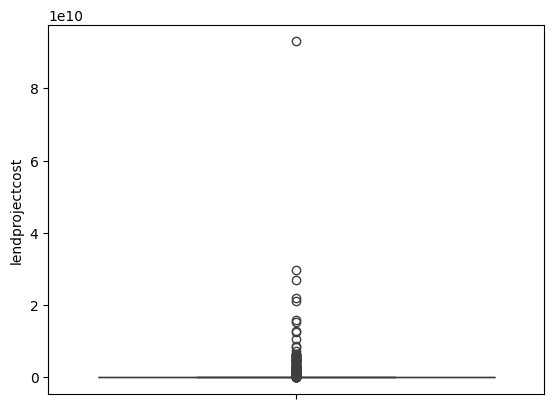

In [35]:
# Boxplot for catching outliers
sns.boxplot(df_projects['lendprojectcost'])

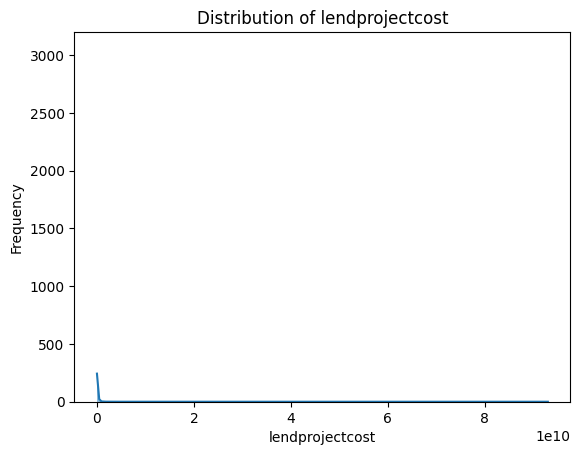

In [36]:
# Histogram to visualize lendprojectcost distribution
plt.xlabel('lendprojectcost')
plt.ylabel('Frequency')
plt.title('Distribution of lendprojectcost')
sns.histplot(df_projects['lendprojectcost'], kde=True)
plt.show()

In [37]:
# Find Q1 dan Q3 value
Q1 = df_projects['lendprojectcost'].quantile(0.25)
Q3 = df_projects['lendprojectcost'].quantile(0.75)
print("Q1: ",Q1)
print("Q3: ",Q3)

# Count IQR
iqr = Q3 - Q1
print("IQR: ", iqr)

# Count upper dan lower limit
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

# display(df_projects[df_projects['lendprojectcost'] > upper_limit])

Q1:  10000000.0
Q3:  97075000.0
IQR:  87075000.0
Upper limit 227687500.0
Lower limit -120612500.0


#### Delete Outlier

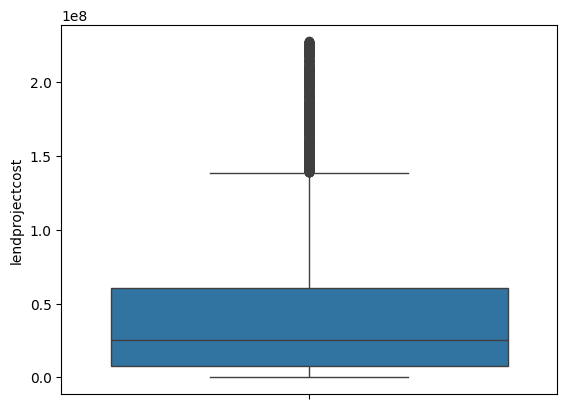

In [38]:
# Filter out rows where 'lendprojectcost' falls outside of the bounds
df_filtered = df_projects[
    (df_projects['lendprojectcost'] >= lower_limit)
    & (df_projects['lendprojectcost'] <= upper_limit)
]

# Create the boxplot without outliers
sns.boxplot(df_filtered['lendprojectcost'])

# Show the plot
plt.show()

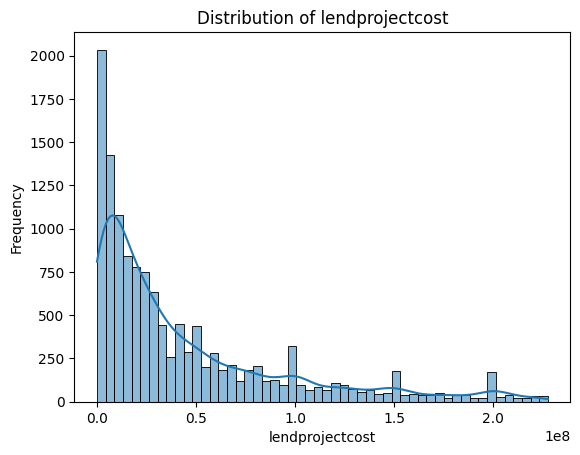

In [39]:
# Histogram to visualize lendprojectcost distribution
plt.xlabel('lendprojectcost')
plt.ylabel('Frequency')
plt.title('Distribution of lendprojectcost')
sns.histplot(df_filtered['lendprojectcost'], kde=True)
plt.show()

In [40]:
# Find Q1 dan Q3 value
Q1 = df_filtered['lendprojectcost'].quantile(0.25)
Q3 = df_filtered['lendprojectcost'].quantile(0.75)
print("Q1: ",Q1)
print("Q3: ",Q3)

# Count IQR
iqr = Q3 - Q1
print("IQR: ", iqr)

# Count upper dan lower limit
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Q1:  8000000.0
Q3:  60300000.0
IQR:  52300000.0
Upper limit 138750000.0
Lower limit -70450000.0


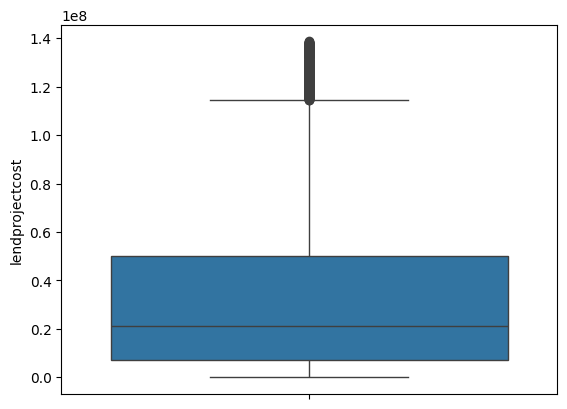

In [41]:
# Filter out rows where 'lendprojectcost' falls outside of the bounds
df_filtered_2 = df_filtered[
    (df_filtered['lendprojectcost'] >= lower_limit)
    & (df_filtered['lendprojectcost'] <= upper_limit)
]

# Create the boxplot without outliers
sns.boxplot(df_filtered_2['lendprojectcost'])

# Show the plot
plt.show()

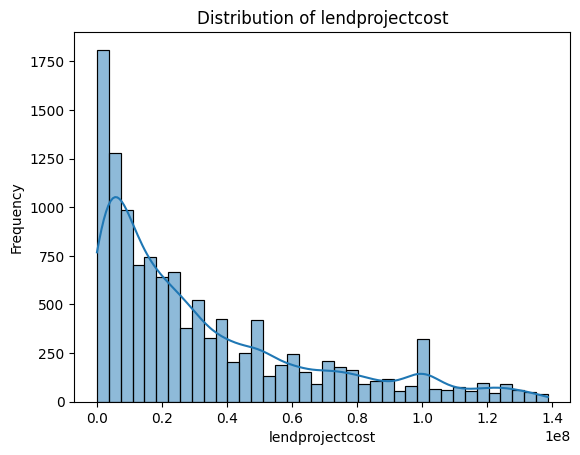

In [42]:
# Histogram to visualize lendprojectcost distribution
plt.xlabel('lendprojectcost')
plt.ylabel('Frequency')
plt.title('Distribution of lendprojectcost')
sns.histplot(df_filtered_2['lendprojectcost'], kde=True)
plt.show()

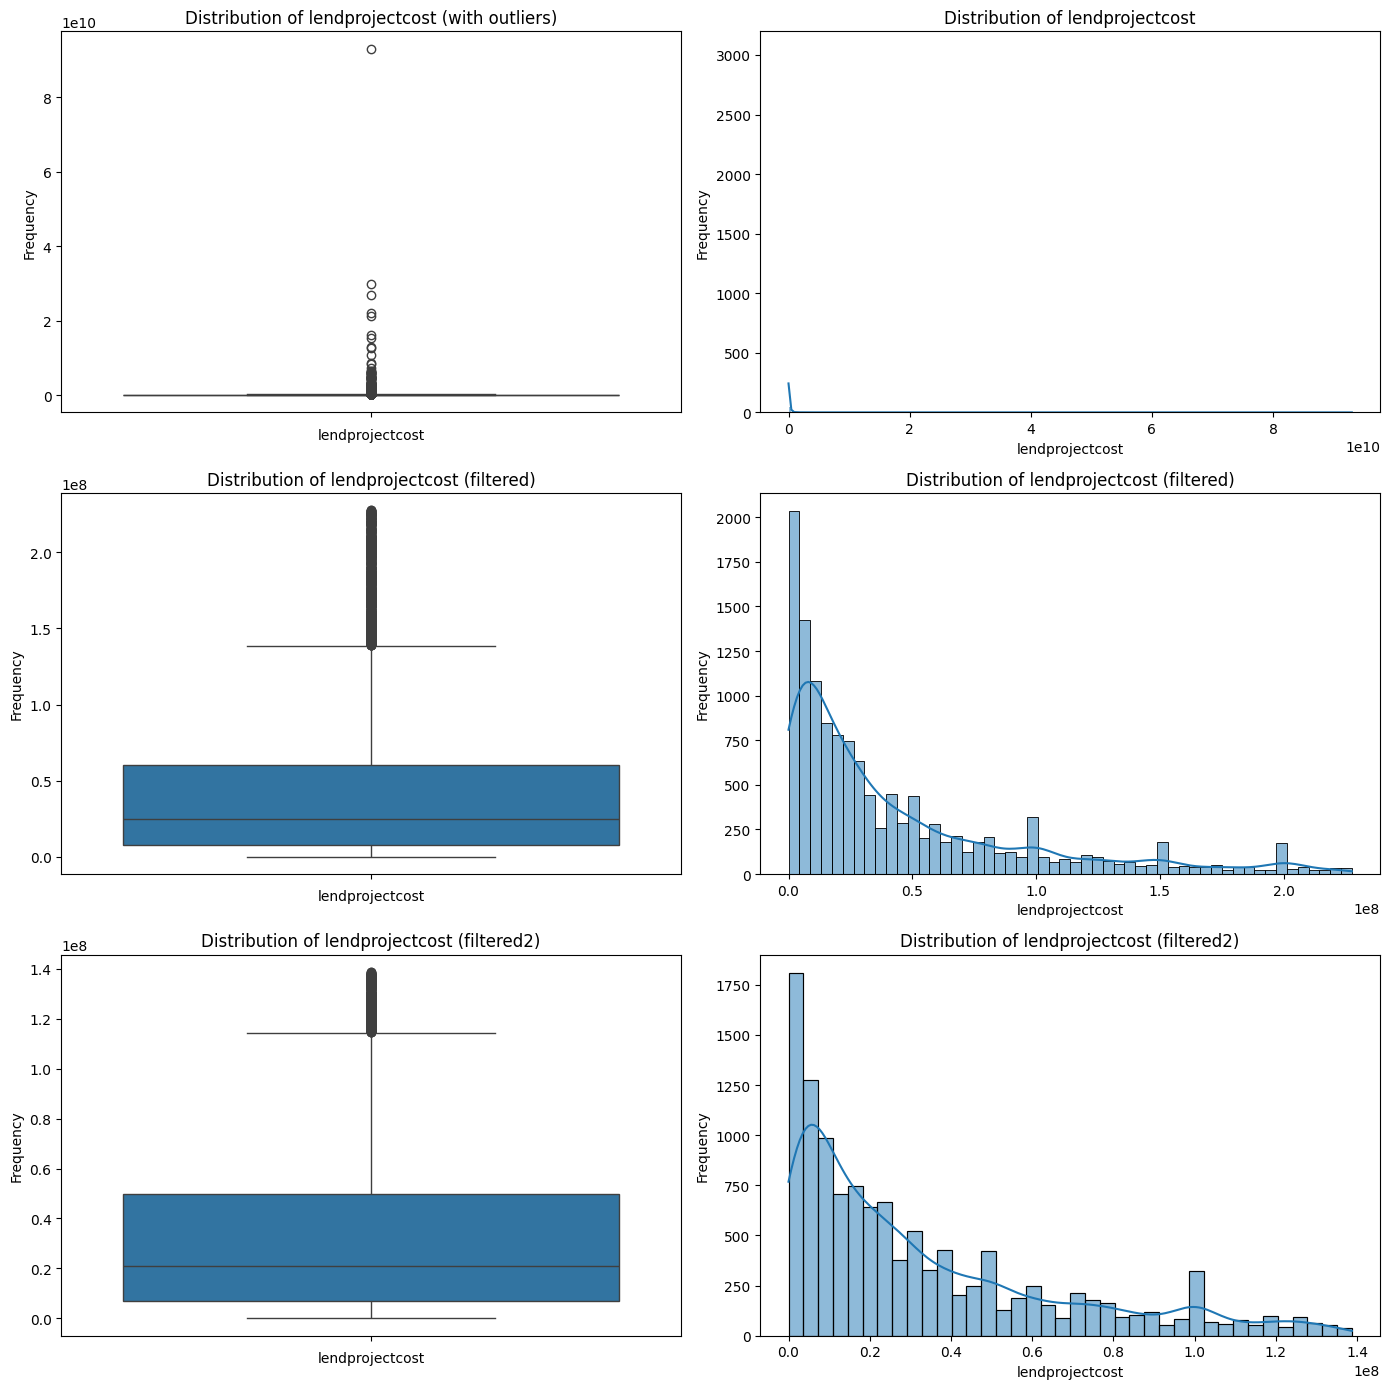

In [43]:
# Create subplots (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

# Plot 1: Boxplot with outliers
sns.boxplot(df_projects['lendprojectcost'], ax=axs[0, 0])
axs[0, 0].set_xlabel('lendprojectcost')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of lendprojectcost (with outliers)')

# Plot 2: Histogram with KDE for lendprojectcost
sns.histplot(df_projects['lendprojectcost'], kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('lendprojectcost')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of lendprojectcost')

# Plot 3: Boxplot without outliers
sns.boxplot(df_filtered['lendprojectcost'], ax=axs[1, 0])
axs[1, 0].set_xlabel('lendprojectcost')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of lendprojectcost (filtered)')

# Plot 4: Histogram with KDE for lendprojectcost (filtered)
sns.histplot(df_filtered['lendprojectcost'], kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('lendprojectcost')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of lendprojectcost (filtered)')

# Plot 5: Boxplot filtered2 without outliers
sns.boxplot(df_filtered_2['lendprojectcost'], ax=axs[2, 0])
axs[2, 0].set_xlabel('lendprojectcost')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].set_title('Distribution of lendprojectcost (filtered2)')

# Plot 6: Histogram filtered2 with KDE for lendprojectcost (filtered2)
sns.histplot(df_filtered_2['lendprojectcost'], kde=True, ax=axs[2, 1])
axs[2, 1].set_xlabel('lendprojectcost')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].set_title('Distribution of lendprojectcost (filtered2)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Scaling Features: Standart Scaler

In [44]:
numeric_columns = ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']
df_numeric = df_projects[numeric_columns]

df_scaled = df_numeric.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

display(df_scaled)

array([[ 0.07242059, -0.35788624,  3.15304736,  1.00102448, -0.0982979 ],
       [-0.08372272, -0.35788624, -0.03485235, -0.35644021, -0.0982979 ],
       [-0.03167495, -0.35788624,  1.38199197,  0.24687743, -0.0982979 ],
       ...,
       [-0.09413227, -0.04184492, -0.38906343, -0.2056108 , -0.0982979 ],
       [ 0.06721581,  1.18281519, -0.38906343,  0.96331713, -0.0982979 ],
       [ 0.12446836,  1.617372  , -0.38906343,  1.37809801, -0.0982979 ]])

### Feature Engineering

In [45]:
country_name_code_dict = dict(zip(load_df_rp_ea['Country Name'], load_df_rp_ea['Country Code']))
display((country_name_code_dict))

df_country_name = pd.read_csv('country_name_map.csv')

df_projects = pd.merge(df_projects, df_country_name, left_on='countryname', right_on='Official_Country_Name', how='left')
df_projects['Country Code'] = df_projects['Country_Name'].map(country_name_code_dict)

df_projects = df_projects.drop(columns='Official_Country_Name')
df_projects['Country_Name'] = df_projects['Country_Name'].fillna(df_projects['countryname'])

df_projects = df_projects.drop(columns='countryname')
df_projects = df_projects.rename(columns={'Country_Name': 'Country Name'})

display(df_projects.head())

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Arab World': 'ARB',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas, The': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'British Virgin Islands': 'VGB',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Caribbean small states': 'CSS',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Central Europe and the Baltics': 'CEB',
 'Chad': 'TCD',
 'Channel Islands': 'CHI',
 'Chile': 'CHL',
 'China': 'CHN

,id,regionname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,projectstatusdisplay,project_name,boardapprovaldate,...,grantamt,borrower,impagency,url,mjsector,goal,sector_new,theme_new,Country Name,Country Code
0,P163962,Africa,PE,Investment Project Financing,IN,B,N,Active,Productive Inclusion Project,2018-06-28 00:00:00+00:00,...,0.0,UNIDENTIFIED,UNIDENTIFIED,http://projects.worldbank.org/P163962?lang=en,UNIDENTIFIED,UNIDENTIFIED,UNIDENTIFIED,UNIDENTIFIED,"Congo, Dem. Rep",NaN
1,P158768,South Asia,PE,Investment Project Financing,IN,A,N,Active,Public-Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,...,0.0,IIST,IIST,http://projects.worldbank.org/P158768?lang=en,UNIDENTIFIED,UNIDENTIFIED,UNIDENTIFIED,UNIDENTIFIED,Afghanistan,AFG
2,P161364,Africa,PE,Investment Project Financing,IN,B,N,Active,Nigeria For Women Project,2018-06-27 00:00:00+00:00,...,0.0,UNIDENTIFIED,UNIDENTIFIED,http://projects.worldbank.org/P161364?lang=en,Social Protection!Industry! Trade and Services...,UNIDENTIFIED,Social Protection!Other Industry! Trade and Se...,UNIDENTIFIED,Nigeria,NGA
3,P161483,Middle East and North Africa,PE,Development Policy Lending,AD,UNIDENTIFIED,N,Active,Tunisia Investment; Competitiveness and Inclusion,2018-06-27 00:00:00+00:00,...,0.0,EET,IIST,http://projects.worldbank.org/P161483?lang=en,UNIDENTIFIED,UNIDENTIFIED,UNIDENTIFIED,UNIDENTIFIED,Tunisia,TUN
4,P161885,Africa,PE,Investment Project Financing,IN,B,N,Active,Nigeria Electrification Project,2018-06-27 00:00:00+00:00,...,0.0,UNIDENTIFIED,UNIDENTIFIED,http://projects.worldbank.org/P161885?lang=en,UNIDENTIFIED,UNIDENTIFIED,UNIDENTIFIED,UNIDENTIFIED,Nigeria,NGA


In [46]:
# Adding feature
df_projects['lend_commamt_ratio'] = df_projects['totalamt'] / df_projects['lendprojectcost'] * 100
df_projects['lend_grant_ratio'] = df_projects['grantamt'] / df_projects['lendprojectcost'] * 100
df_projects['Year'] = df_projects['boardapprovaldate'].dt.year.astype(str)

In [47]:
display(df_projects[['Country Name', 'Country Code', 'Year','lendprojectcost']].head(25))

,Country Name,Country Code,Year,lendprojectcost
0,"Congo, Dem. Rep",NaN,2018,2.000000e+08
1,Afghanistan,AFG,2018,5.000000e+07
2,Nigeria,NGA,2018,1.000000e+08
3,Tunisia,TUN,2018,5.000000e+08
4,Nigeria,NGA,2018,7.650000e+08
5,Nigeria,NGA,2018,2.320000e+08
6,Nigeria,NGA,2018,1.250000e+08
7,Lebanese Republic,NaN,2018,6.950000e+08
8,Sri Lanka,LKA,2018,4.419000e+09
9,Jordan,JOR,2018,5.000000e+08


### Prepare for load

In [48]:
load_df_projects = df_projects.copy()
load_df_projects = load_df_projects[['Country Name', 'Country Code', 'Year','lendprojectcost']]

load_df_projects = load_df_projects.groupby(['Country Code', 'Country Name', 'Year']).agg({
    'lendprojectcost': 'sum',
}).reset_index()

load_df_projects = load_df_projects.rename(columns={'lendprojectcost': 'projectcost'})

## 3. Population

### Check Data

In [49]:
def check_country_names(df1, df2):

    country_names_df1 = set(df1['Country Name'])
    country_names_df2 = set(df2['Country Name'])

    if country_names_df1 == country_names_df2:
        print("The 'Country Name' values are the same in both DataFrames.")
    else:
        only_df1 = country_names_df1 - country_names_df2
        only_df2 = country_names_df2 - country_names_df1

        print("The 'Country Name' values are different between the two DataFrames.")
        print("Values only in df1:", only_df1)
        print("Values only in df2:", only_df2)

def check_column_names(df1, df2):
    
    if set(df1.columns) == set(df2.columns):
        print("The column names are the same in both DataFrames.")
    else:
        print("The column names are different between the two DataFrames.")
        print("Columns only in df1:", set(df1.columns) - set(df2.columns))
        print("Columns only in df2:", set(df2.columns) - set(df1.columns))

### Merge 1

In [50]:
check_column_names(df_population_csv, df_population_json)
check_country_names(df_population_csv, df_population_json)

# display(df_population_csv.shape)
# display(df_population_csv[['Unnamed: 62']].isna().sum())
df_population_csv = df_population_csv.drop(columns=['Unnamed: 62'])

merged_1 = pd.merge(df_population_csv, df_population_json, how='outer')

The column names are different between the two DataFrames.
Columns only in df1: {'Unnamed: 62'}
Columns only in df2: set()
The 'Country Name' values are the same in both DataFrames.


### Merge 2

In [51]:
check_column_names(merged_1, df_population_xml)
check_country_names(merged_1, df_population_xml)

rows_merged_1 = merged_1[merged_1['Country Name'] == 'Korea, Dem. People’s Rep.']
rows_df_population_xml = df_population_xml[df_population_xml['Country Name'] == 'Korea, Dem. Peopleâ€™s Rep.']

rows_merged_1.reset_index(drop=True, inplace=True)
rows_df_population_xml.reset_index(drop=True, inplace=True)

display(rows_merged_1.compare(rows_df_population_xml))

df_population_xml = df_population_xml.drop(df_population_xml[df_population_xml['Country Name'] == 'Korea, Dem. Peopleâ€™s Rep.'].index)
df_population_xml.reset_index(drop=True, inplace=True)

merged_2 = pd.merge(merged_1, df_population_xml, how='outer')


The column names are the same in both DataFrames.
The 'Country Name' values are different between the two DataFrames.
Values only in df1: {'Korea, Dem. People’s Rep.'}
Values only in df2: {'Korea, Dem. Peopleâ€™s Rep.'}


Country Name                             
                        self                        other
0  Korea, Dem. People’s Rep.  Korea, Dem. Peopleâ€™s Rep.

### Merge 3

In [52]:
check_column_names(merged_2, df_population_db)
check_country_names(merged_2, df_population_db)

merged_3 = pd.merge(merged_2, df_population_db, how='outer')

The column names are the same in both DataFrames.
The 'Country Name' values are the same in both DataFrames.


### Merge 4

In [53]:
df_population_api['Country Code'] = df_population_api['Country Code'].replace("", pd.NA)

check_column_names(merged_3, df_population_api)
check_country_names(merged_3, df_population_api)

merged_3 = merged_3.copy()
df_population_api = df_population_api.copy()

merged_3['Source'] = 'merged_3'
df_population_api['Source'] = 'api'

merged_4 = pd.merge(merged_3, df_population_api, how='outer')

# Drop merged_3 df rows that has the same duplicate values of country code 
duplicated_code_rows = merged_4[merged_4.duplicated(subset='Country Code', keep=False)]
dropped_rows = duplicated_code_rows[duplicated_code_rows['Source'] == 'merged_3']
rows_to_drop_indices = dropped_rows.index
merged_4 = merged_4.drop(rows_to_drop_indices)

# Fill cleaned_merged_4 Country Code Null Values with forward fill where they're being group by the Country Name
merged_4['Country Code'] = merged_4.groupby('Country Name')['Country Code'].transform(lambda x: x.ffill())

# Drop merged_3 df rows that has the same duplicate values of country name 
duplicated_name_rows = merged_4[merged_4.duplicated(subset='Country Name', keep=False)]
dropped_rows_name = duplicated_name_rows[duplicated_name_rows['Source'] == 'merged_3']
rows_to_drop_indices_name = dropped_rows_name.index
merged_4 = merged_4.drop(rows_to_drop_indices_name)

# Rearrange the column names and drop Source column
column_names = merged_3.columns.tolist()
column_names = column_names + ['2018', '2019', '2020', '2021', '2022', '2023']

merged_4 = merged_4[column_names]
merged_4 = merged_4.drop(columns=['Source'])
merged_4 = merged_4.reset_index(drop=True)

# Display final merge of population data
display(merged_4.head())
display(merged_4.info())

The column names are different between the two DataFrames.
Columns only in df1: set()
Columns only in df2: {'2022', '2019', '2021', '2020', '2018', '2023'}
The 'Country Name' values are different between the two DataFrames.
Values only in df1: {'Czech Republic', 'Korea, Dem. People’s Rep.', 'Macedonia, FYR', 'Turkey', 'Vietnam', 'Swaziland'}
Values only in df2: {"Korea, Dem. People's Rep.", 'Turkiye', 'Africa Western and Central', 'Czechia', 'Africa Eastern and Southern', 'North Macedonia', 'Eswatini', 'Viet Nam'}


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,NaN
4,Algeria,DZA,"Population, total",SP.POP.TOTL,11394307.0,11598608.0,11778260.0,11969451.0,12179099.0,12381256.0,...,38760168.0,39543154.0,40339329.0,41136546.0,41927007.0,42705368.0,43451666.0,44177969.0,44903225.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    266 non-null    object
 1   Country Code    266 non-null    object
 2   Indicator Name  266 non-null    object
 3   Indicator Code  266 non-null    object
 4   1960            264 non-null    object
 5   1961            264 non-null    object
 6   1962            264 non-null    object
 7   1963            264 non-null    object
 8   1964            264 non-null    object
 9   1965            264 non-null    object
 10  1966            264 non-null    object
 11  1967            264 non-null    object
 12  1968            264 non-null    object
 13  1969            264 non-null    object
 14  1970            264 non-null    object
 15  1971            264 non-null    object
 16  1972            264 non-null    object
 17  1973            264 non-null    object
 18  1974      

None

### Data Cleaning

In [54]:
df_population = merged_4.copy()

#### Deletion

In [55]:
df_population = default_delete_data(df_population, ['Indicator Name', 'Indicator Code'])

In [56]:
df_population = all_years_null_delete(df_population)

#### Imputation

In [57]:
columns_to_convert_to_float = df_population.columns[2:]
df_population[columns_to_convert_to_float] = df_population[columns_to_convert_to_float].astype(float)

imp_interpolate(df_population)

### Melt Data

In [58]:
load_df_population = melt_data(df_population, 'population')

## 4. GDP

### View Data

In [59]:
df_gdp = pd.read_csv('data_source/gdp_data.csv', skiprows=4)

In [60]:
view_data(df_gdp)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN
263,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,8.621574e+09,1.014186e+10,1.209845e+10,1.424249e+10,1.545177e+10,1.589105e+10,1.630467e+10,1.661996e+10,1.784582e+10,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            124 non-null    float64
 5   1961            124 non-null    float64
 6   1962            125 non-null    float64
 7   1963            125 non-null    float64
 8   1964            125 non-null    float64
 9   1965            136 non-null    float64
 10  1966            137 non-null    float64
 11  1967            141 non-null    float64
 12  1968            145 non-null    float64
 13  1969            145 non-null    float64
 14  1970            153 non-null    float64
 15  1971            155 non-null    float64
 16  1972            155 non-null    float64
 17  1973            155 non-null    flo

None

Country Name      264
Country Code      264
Indicator Name      1
Indicator Code      1
1960              123
                 ... 
2014              245
2015              244
2016              239
2017              232
Unnamed: 62         0
Length: 63, dtype: int64

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64

(264, 63)

### Data Cleaning

#### Deletion

In [61]:
df_gdp = default_delete_data(df_gdp, ['Indicator Name', 'Indicator Code'])

In [62]:
df_gdp = all_years_null_delete(df_gdp)

#### Imputation

In [63]:
imp_interpolate(df_gdp, 2, 'none')
imp_interpolate(df_gdp)

### Melt Data

In [64]:
load_df_gdp = melt_data(df_gdp, 'gdp')

# Load

## Import Library

In [66]:
# Read .env
from dotenv import load_dotenv
import os

# Upload to firebase
import firebase_admin
from firebase_admin import credentials
from firebase_admin import storage

## Merge Dataset

In [65]:
df_load = load_df_gdp.merge(load_df_population, on=['Country Name', 'Country Code', 'Year'], how='outer')
df_load = df_load.merge(load_df_rp_ea, on=['Country Name', 'Country Code', 'Year'], how='outer')
df_load = df_load.merge(load_df_projects, on=['Country Name', 'Country Code', 'Year'], how='outer')
df_load['gdppercapita'] = df_load.apply(lambda x: x['gdp'] / x['population'] if x['population'] != 0 else pd.NA, axis=1)

display(df_load.head(5))
display(df_load.shape)
display(df_load.info())

,Country Name,Country Code,Year,gdp,population,ruralpopulationpercent,electricityaccesspercent,projectcost,gdppercapita
0,Afghanistan,AFG,1960,5.377778e+08,8622466.0,91.779,NaN,NaN,62.369375
1,Afghanistan,AFG,1961,5.488889e+08,8790140.0,91.492,NaN,NaN,62.443703
2,Afghanistan,AFG,1962,5.466667e+08,8969047.0,91.195,NaN,NaN,60.950364
3,Afghanistan,AFG,1963,7.511112e+08,9157465.0,90.890,NaN,NaN,82.021738
4,Afghanistan,AFG,1964,8.000000e+08,9355514.0,90.574,NaN,3500000.0,85.511073


(17197, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              17197 non-null  object 
 1   Country Code              17197 non-null  object 
 2   Year                      17197 non-null  object 
 3   gdp                       14848 non-null  float64
 4   population                16695 non-null  float64
 5   ruralpopulationpercent    15138 non-null  float64
 6   electricityaccesspercent  7047 non-null   float64
 7   projectcost               4643 non-null   float64
 8   gdppercapita              14558 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


None

## Upload Firebase

In [208]:
def load_data(df):

    load_dotenv()
    CERTIFICATE_PATH = os.getenv('CERTIFICATE_PATH')
    GOOGLE_STORAGE_BUCKET = os.getenv('GOOGLE_STORAGE_BUCKET')

    try:
        cred = credentials.Certificate(CERTIFICATE_PATH)

        storage_bucket = GOOGLE_STORAGE_BUCKET

        firebase_admin.initialize_app(cred, {"storageBucket": storage_bucket})

        bucket = storage.bucket()

        filename = "miniproject.csv"

        df.to_csv(filename, index=False)

        blob = bucket.blob(blob_name=filename)

        blob.upload_from_filename(filename)

        print("Data loaded successfully")
            
    except Exception as e:
        print(f"An error occurred when loading data to the storage: {e}")

load_data(df_load)

Data loaded successfully


# Data Visualization

## Projects

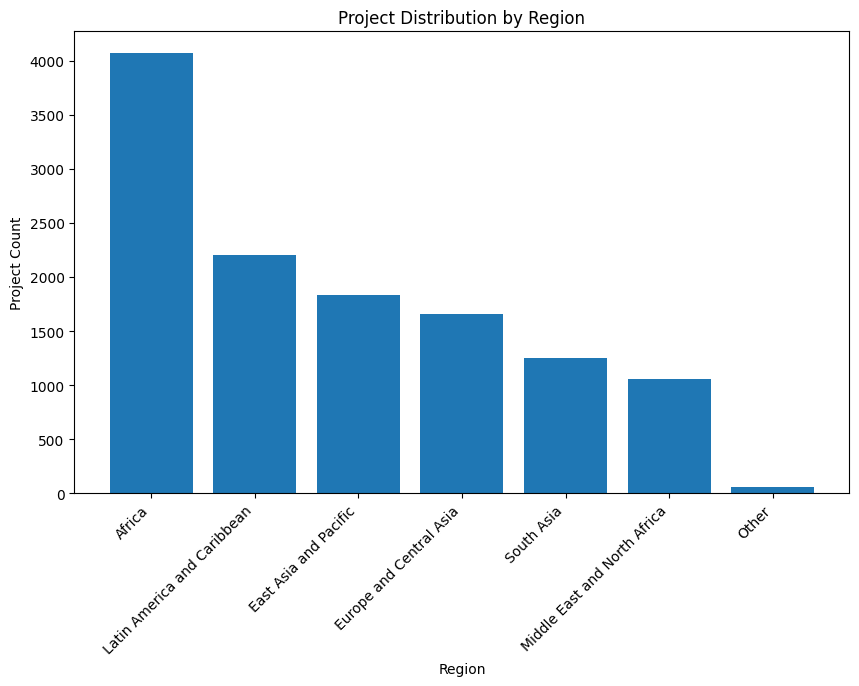

In [209]:
project_count_by_region = df_projects['regionname'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(project_count_by_region.index , project_count_by_region.values)
plt.title('Project Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Project Count')
plt.xticks(rotation=45, ha='right')
plt.show()


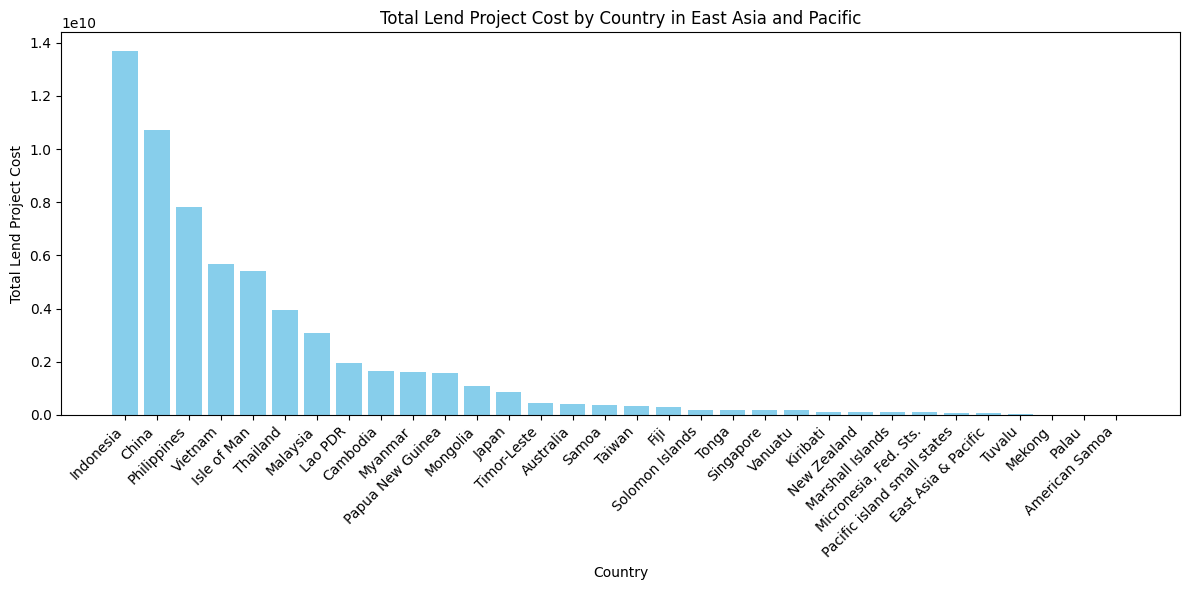

In [210]:
df_eap = df_projects[df_projects['regionname'] == 'East Asia and Pacific']
lend_project_cost_by_country_eap = df_eap.groupby('Country Name')['lendprojectcost'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(lend_project_cost_by_country_eap.index, lend_project_cost_by_country_eap.values, color='skyblue')
plt.title('Total Lend Project Cost by Country in East Asia and Pacific')
plt.xlabel('Country')
plt.ylabel('Total Lend Project Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

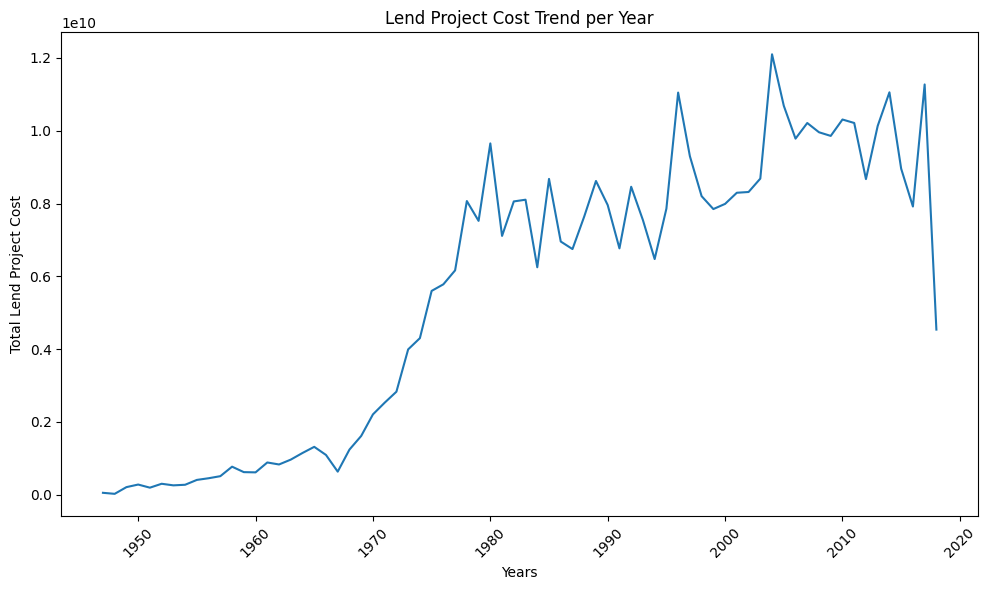

In [211]:
project_cost_by_year = df_projects.groupby(df_projects['boardapprovaldate'].dt.year)['lendprojectcost'].sum()

plt.figure(figsize=(10, 6))
plt.plot(project_cost_by_year.index, project_cost_by_year.values)
plt.title('Lend Project Cost Trend per Year')
plt.xlabel('Years')
plt.ylabel('Total Lend Project Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [217]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        12140 non-null  object             
 1   regionname                12140 non-null  object             
 2   prodline                  12140 non-null  object             
 3   lendinginstr              12140 non-null  object             
 4   lendinginstrtype          12140 non-null  object             
 5   envassesmentcategorycode  12140 non-null  object             
 6   supplementprojectflg      12140 non-null  object             
 7   projectstatusdisplay      12140 non-null  object             
 8   project_name              12140 non-null  object             
 9   boardapprovaldate         12140 non-null  datetime64[ns, UTC]
 10  board_approval_month      12140 non-null  object             
 11  closingdate    

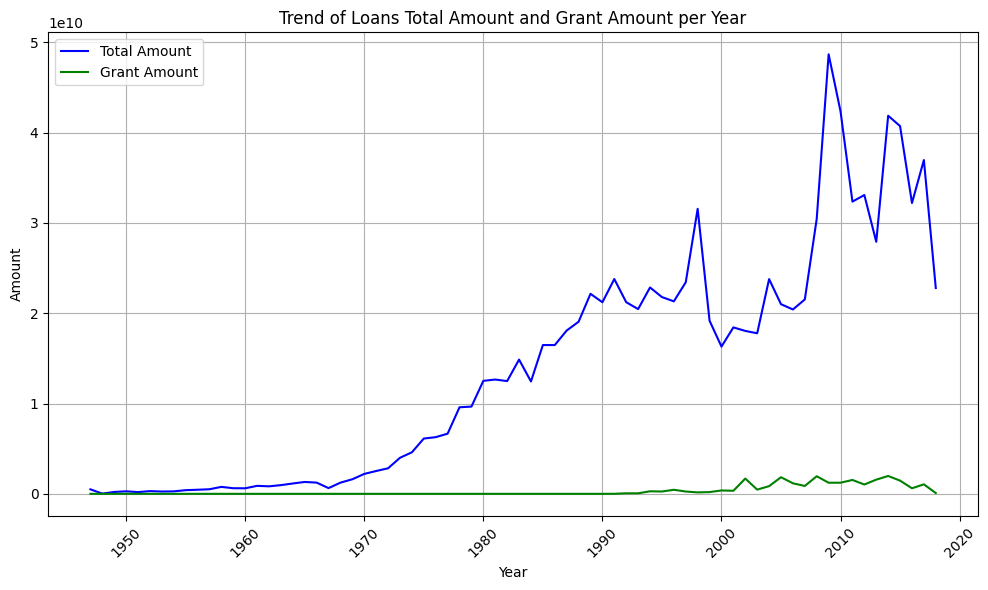

In [67]:
totalamt_by_year = df_projects.groupby(df_projects['boardapprovaldate'].dt.year)['totalamt'].sum()
grantamt_by_year = df_projects.groupby(df_projects['boardapprovaldate'].dt.year)['grantamt'].sum()

plt.figure(figsize=(10, 6))
plt.plot(totalamt_by_year.index, totalamt_by_year.values, label='Total Amount', color='blue')
plt.plot(grantamt_by_year.index, grantamt_by_year.values, label='Grant Amount', color='green')

plt.title('Trend of Loans Total Amount and Grant Amount per Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


## Population

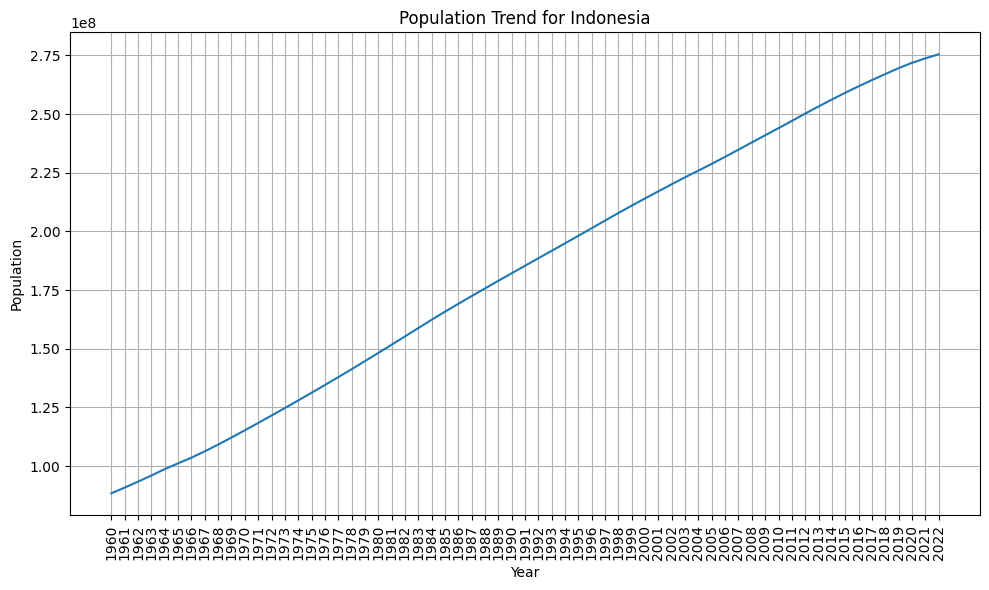

In [213]:
country_name = 'Indonesia'

plt.figure(figsize=(10, 6))
plt.plot(df_population.columns[2:], df_population[df_population['Country Name'] == country_name].iloc[:, 2:].values.flatten())
plt.title(f'Population Trend for {country_name}')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


## Combined

In [214]:
display(df_load.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17196 entries, 0 to 17195
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              17196 non-null  object 
 1   Country Code              17196 non-null  object 
 2   Year                      17196 non-null  object 
 3   gdp                       14848 non-null  float64
 4   population                16695 non-null  float64
 5   ruralpopulationpercent    15138 non-null  float64
 6   electricityaccesspercent  7047 non-null   float64
 7   projectcost               4478 non-null   float64
 8   gdppercapita              14558 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


None

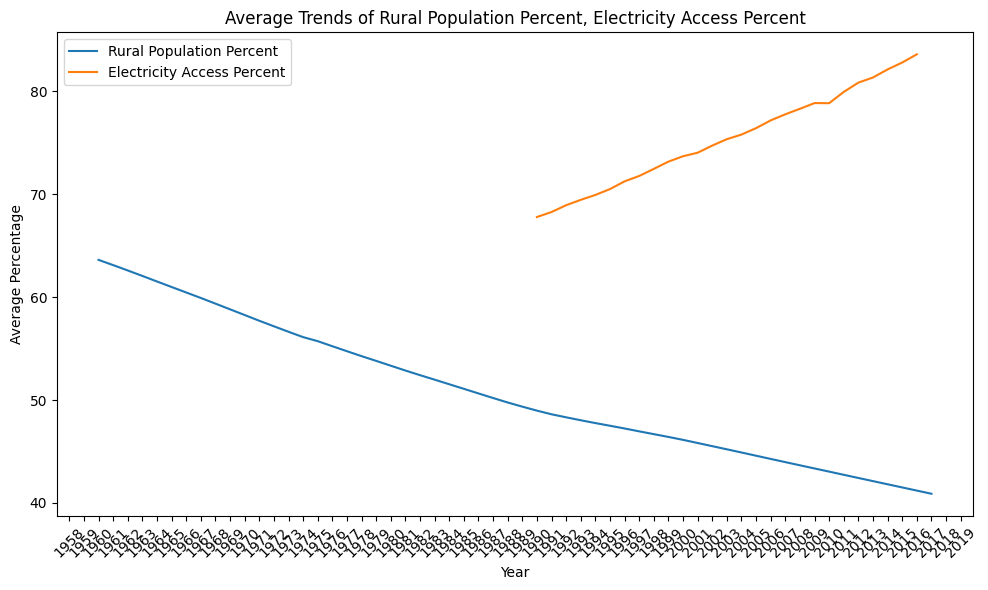

In [215]:
avg_data_per_year = df_load.groupby('Year').agg({'ruralpopulationpercent': 'mean',
                                                 'electricityaccesspercent': 'mean'})
avg_data_per_year.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(avg_data_per_year['Year'], avg_data_per_year['ruralpopulationpercent'], label='Rural Population Percent')
plt.plot(avg_data_per_year['Year'], avg_data_per_year['electricityaccesspercent'], label='Electricity Access Percent')

plt.title('Average Trends of Rural Population Percent, Electricity Access Percent')
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
